In [13]:
import os
import sys
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [14]:
cwd = os.getcwd()
# Find and import config file
config_path = os.getcwd()

sys.path.append(config_path)
import config

In [15]:
database = config.database
central_banks = config.central_banks
training_data = os.path.join(database, "Training Data")
fed_docs = config.fed_docs
ecb_docs = config.ecb_docs

In [16]:
sentiment = pd.date_range(start="1/1/1990", end="1/1/2024", freq="D")
sentiment = pd.DataFrame(sentiment, columns=["date"])

In [17]:
# HP Filter

# url_map = pd.read_csv(os.path.join(cwd, "url_map.csv"))

# for i in range(len(url_map)):
#     if url_map["central bank"][i] == "fed" and url_map["document"][i] == "speeches":
#         speeches = pd.read_csv(url_map["finbert_url"][i])

# speeches["date"] = pd.to_datetime(speeches["date"], format='%Y%m%d')

# fed_speech = speeches.copy(deep=True)

# fed_speech = fed_speech[["date", "sentiment"]]
# fed_speech = fed_speech.rename(columns={"sentiment": "fed_speech_sentiment"})
# fed_speech["date"] = pd.to_datetime(fed_speech["date"])

# fed_speech = fed_speech.resample("Q", on="date").mean().reset_index()

# filter_df = fed_speech.copy(deep=True)
# filter_df = filter_df[["date", "fed_speech_sentiment"]]

# cycle, trend = sm.tsa.filters.hpfilter(filter_df["fed_speech_sentiment"], 1600)

# filter_df["fed_speech_sentiment_cycle"] = cycle
# filter_df["fed_speech_sentiment_trend"] = trend

# filter_df = filter_df[["date", "fed_speech_sentiment_cycle"]]
# fed_speech = fed_speech.drop(columns=["fed_speech_sentiment"])
# filter_df = filter_df.rename(
#     columns={"fed_speech_sentiment_cycle": "fed_speech_sentiment"}
# )
# fed_speech = pd.merge(fed_speech, filter_df, on="date", how="left")
# fed_speech = fed_speech.groupby("date").mean().reset_index()

# sentiment = pd.merge(sentiment, fed_speech, how="left", left_on="date", right_on="date")

In [18]:
url_map = pd.read_csv(os.path.join(cwd, "url_map.csv"))

for i in range(len(url_map)):
    sent = pd.read_csv(url_map["finbert_url"][i])
    sent = sent[["date", "sentiment"]]
    sent = sent.rename(columns={"sentiment": url_map["document"][i] + "_sentiment"})

    try:
        sent["date"] = pd.to_datetime(sent["date"], format="mixed")
    except ValueError as e:
        print(f"Error parsing date in file {url_map['finbert_url'][i]}: {e}")
        continue

    sentiment = pd.merge(sentiment, sent, how="left", left_on="date", right_on="date")

Error parsing date in file /Users/kylenabors/Documents/Database/FinBERT Models/fed/beigebooks/finbert.csv: Unknown datetime string format, unable to parse: llreport, at position 13


/var/folders/9h/v8gnzwrs73v52x4lyzz2z2zc0000gn/T/ipykernel_2383/3205134875.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  sent = pd.read_csv(url_map["finbert_url"][i])


Error parsing date in file /Users/kylenabors/Documents/Database/FinBERT Models/ecb/economic bulletins/finbert.csv: Unknown datetime string format, unable to parse: S_Store, at position 9


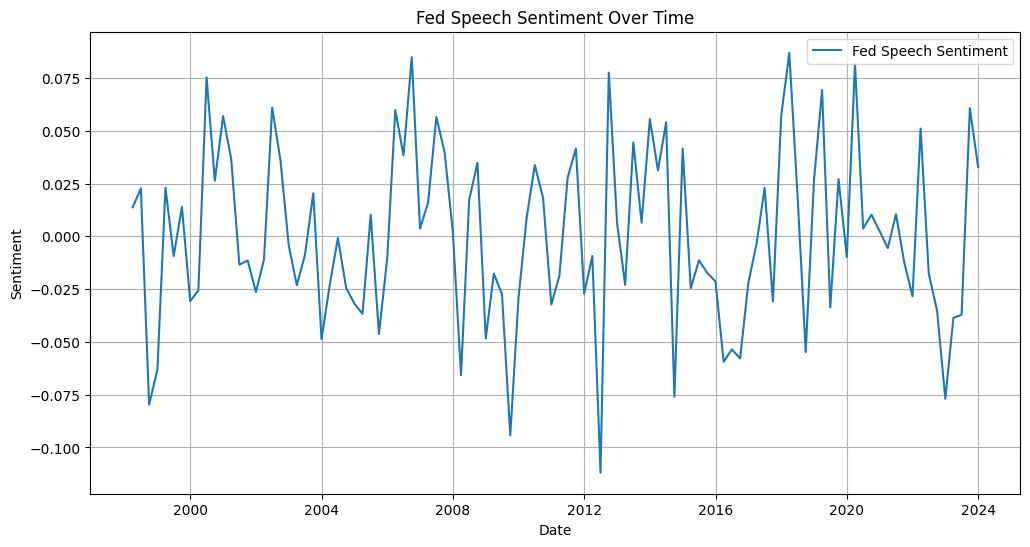

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(
    fed_speech["date"], fed_speech["fed_speech_sentiment"], label="Fed Speech Sentiment"
)
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.title("Fed Speech Sentiment Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [1]:
text = "fullreport20241122.pdf"

text = text.replace(".pdf", "")

print(text)

fullreport20241122
